## Observations and Insights 


It looks like that to reduce tumor growth, Capomulin is a feasible drug regimen for it. 
Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study.
There is a strong correlation of 0.84 between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study.

In [89]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [56]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [57]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [58]:
# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice, unique values 
#(add 'n' to the front of unique to count the different unique values) ) 
total_mice = combined_data["Mouse ID"].nunique()
total_mice

249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes =  combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
dupes

dup_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_df = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = combined_data.drop_duplicates(subset=['Mouse ID'])
#clean_data
clean_data = combined_data[combined_data['Mouse ID'].isin(dupes) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame. using nunique function, number of unique features
clean_data["Mouse ID"].nunique()

248

# Summary Statistics
* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
* Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
* mean, median, variance, standard deviation, and SEM of the tumor volume. 
* Assemble the resulting series into a single summary dataframe.

In [64]:
#Calculated the mean, median,var, STD, SEM by using groupby of the column names
mean_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

med_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

var_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

std_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

sem_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean" : mean_cleandata, "Median": med_cleandata, "Variance" : var_cleandata, "Standard Deviation": std_cleandata, "SEM" : sem_cleandata})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [66]:
#counting the amount of mice in each of the drug regimen 
drugdata = clean_data["Drug Regimen"].value_counts()
drugdata

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

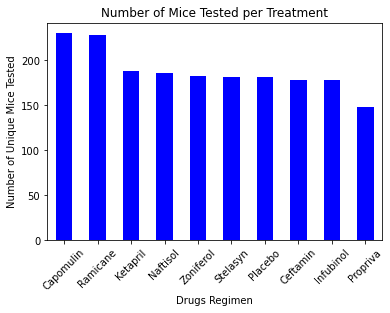

In [67]:
# Create a dataframe counting the number of data points for each Drug Regimen
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
 
drugdata = clean_data["Drug Regimen"].value_counts()
y_axis = drugdata.values
x_axis = drugdata.values
plt.xlabel('Drugs Regimen')
plt.ylabel('Number of Unique Mice Tested') 
plt.title("Number of Mice Tested per Treatment")
drugdata.plot(kind="bar", color="blue")
plt.xticks(rotation="45")

<function matplotlib.pyplot.show(*args, **kw)>

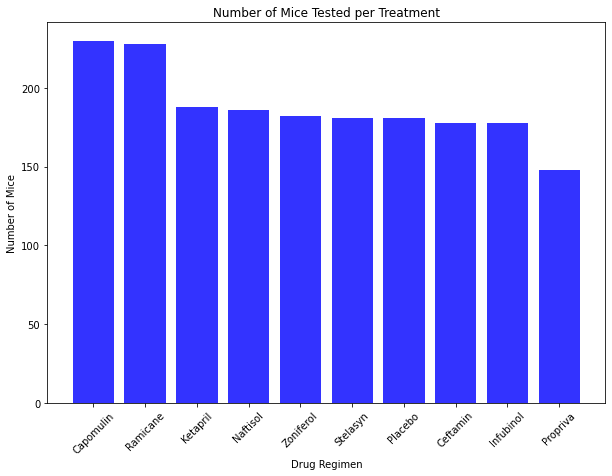

In [68]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = drugdata.index.values
y_axis = drugdata.values
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="45")
plt.show 


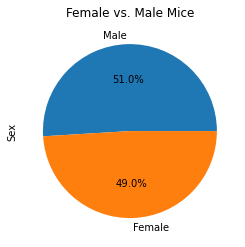

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drugdata_sex = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
drugdata_sex.plot.pie(autopct= "%1.1f%%")

(-1.25, 1.25, -1.25, 1.25)

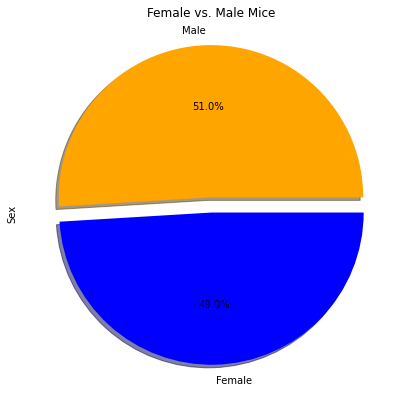

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

x_axis = drugdata_sex.index.values
y_axis = drugdata_sex.values
labels = ['Female', 'Male']
colors = ['orange', 'blue']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 7))
drugdata_sex.plot.pie(explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Female vs. Male Mice")
plt.axis()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

# View the result to confirm transpose
last_timepoint.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_size,NaN,NaN,67.973419,NaN
a251,tumor_size,NaN,NaN,65.525743,NaN
a275,tumor_size,NaN,62.999356,NaN,NaN
a411,tumor_size,NaN,NaN,NaN,38.407618
a444,tumor_size,NaN,NaN,NaN,43.047543


In [73]:
# Put treatments into a list for for loop (and later for plot labels)   
for drug in drug_list:

    treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))

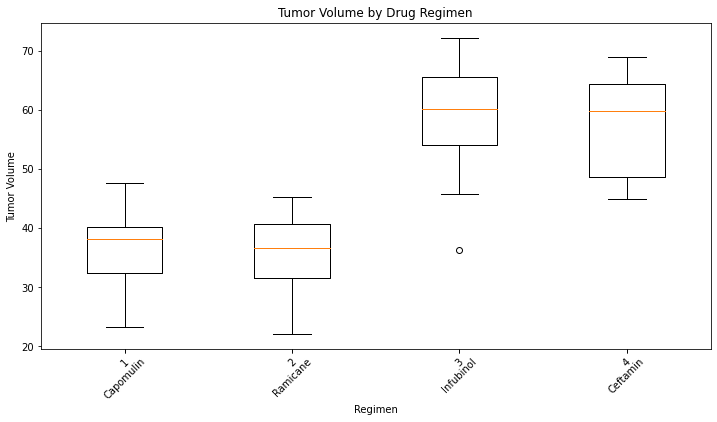

In [75]:
fig = plt.figure(figsize=(12,6))
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

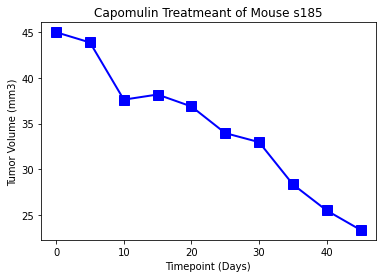

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#We chose to look up and show MouseID "s185" however you can plug in 
#any mouse ID and the graph will popluate the inforamtion. 
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

forline_df = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatmeant of Mouse s185')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=10, marker="s",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [77]:
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


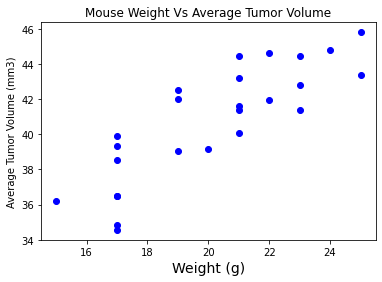

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =capomulin_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Vs Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared is: 0.709


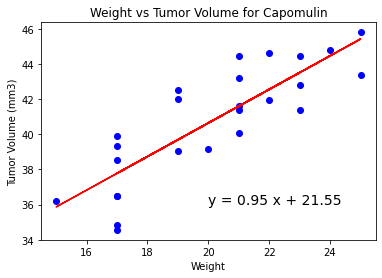

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

In [88]:
#Calculating the correlation between mouse weight and the average tumor volume 

correlation = st.pearsonr(avg_capm_vol["Weight (g)"], avg_capm_vol["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)} ")

The correlation between mouse weight and the average tumor volume is: 0.84 
